In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#total ligne 423768
file_path = "C:/Users/PC HP 1/Desktop/2025-03-21/old_data/socio-demographic_sample_churn.csv"
df = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

Dataset Overview:
   subscriber_id                            msisdn   age marital_status  \
0   2.180738e+09  9f7824805faa121c4f70f935d64b3108  26.0            NaN   
1   2.180744e+09  bbde8acb3c4e13c41c35716c9fff2ade  60.0            NaN   
2   2.180742e+09  5ebf12af9cfef0816a58760fe9f09911  38.0            NaN   
3   2.180743e+09  6cdb9168ddfc41b7c108589ff038ea3b  56.0    Celibataire   
4   2.180743e+09  2310842ccd17058bc0a5cb33a91e7c0d  23.0            NaN   

  gender customer_language contact_city  
0      M             Arabe      touzeur  
1      F             Arabe       nabeul  
2      M             Arabe      EL OUED  
3      M           Anglais      Tunisie  
4      M             Arabe         sfax  

Missing Values:
subscriber_id            1
msisdn                   1
age                  20024
marital_status       99159
gender               68045
customer_language    47394
contact_city          8793
dtype: int64

Basic Statistics:
       subscriber_id            age
count

In [2]:
# Display rows where subscriber_id is missing
missing_subscriber_id = df[df['subscriber_id'].isnull()]

# Print those rows
print("\nRows with null subscriber_id:")
print(missing_subscriber_id)

# Optionally, print how many such rows exist
print(f"\nNumber of rows with null subscriber_id: {missing_subscriber_id.shape[0]}")



Rows with null subscriber_id:
        subscriber_id msisdn  age marital_status gender customer_language  \
403268            NaN    NaN  NaN            NaN    NaN               NaN   

       contact_city  
403268          NaN  

Number of rows with null subscriber_id: 1


In [3]:
# Drop rows where subscriber_id is null
df = df[df['subscriber_id'].notnull()]

# Drop the column 'contact_city'
df = df.drop(columns=['contact_city'])

# Confirm the changes
print("\nShape after cleaning:", df.shape)
print("Remaining columns:", df.columns.tolist())



Shape after cleaning: (423766, 6)
Remaining columns: ['subscriber_id', 'msisdn', 'age', 'marital_status', 'gender', 'customer_language']


In [4]:
# Fill numeric column
df['age'].fillna(df['age'].median(), inplace=True)

# Fill categorical columns with mode
df['marital_status'].fillna(df['marital_status'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['customer_language'].fillna(df['customer_language'].mode()[0], inplace=True)

In [5]:
# Preview the dataset
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   subscriber_id                            msisdn   age marital_status  \
0   2.180738e+09  9f7824805faa121c4f70f935d64b3108  26.0    Celibataire   
1   2.180744e+09  bbde8acb3c4e13c41c35716c9fff2ade  60.0    Celibataire   
2   2.180742e+09  5ebf12af9cfef0816a58760fe9f09911  38.0    Celibataire   
3   2.180743e+09  6cdb9168ddfc41b7c108589ff038ea3b  56.0    Celibataire   
4   2.180743e+09  2310842ccd17058bc0a5cb33a91e7c0d  23.0    Celibataire   

  gender customer_language  
0      M             Arabe  
1      F             Arabe  
2      M             Arabe  
3      M           Anglais  
4      M             Arabe  


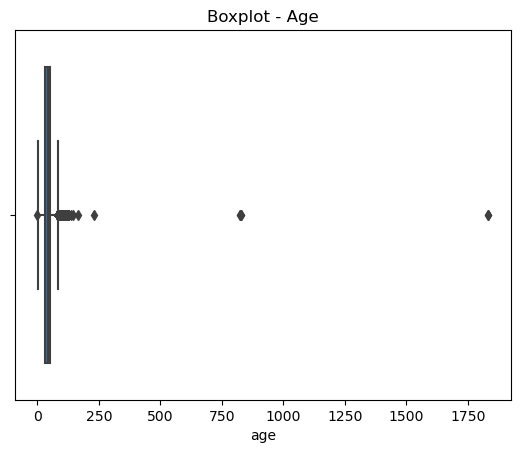

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
sns.boxplot(x=df['age'])
plt.title("Boxplot - Age")
plt.show()

In [7]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

In [8]:
outliers_age = detect_outliers_iqr(df, 'age')
print(f"Number of outliers in 'age': {outliers_age.shape[0]}")

Number of outliers in 'age': 2139


In [9]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [10]:
df = remove_outliers_iqr(df, 'age')

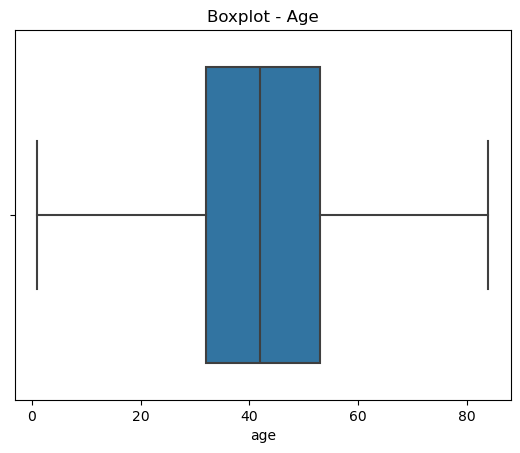

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
sns.boxplot(x=df['age'])
plt.title("Boxplot - Age")
plt.show()

In [12]:
# Preview the dataset
print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

Dataset Overview:
   subscriber_id                            msisdn   age marital_status  \
0   2.180738e+09  9f7824805faa121c4f70f935d64b3108  26.0    Celibataire   
1   2.180744e+09  bbde8acb3c4e13c41c35716c9fff2ade  60.0    Celibataire   
2   2.180742e+09  5ebf12af9cfef0816a58760fe9f09911  38.0    Celibataire   
3   2.180743e+09  6cdb9168ddfc41b7c108589ff038ea3b  56.0    Celibataire   
4   2.180743e+09  2310842ccd17058bc0a5cb33a91e7c0d  23.0    Celibataire   

  gender customer_language  
0      M             Arabe  
1      F             Arabe  
2      M             Arabe  
3      M           Anglais  
4      M             Arabe  

Missing Values:
subscriber_id        0
msisdn               0
age                  0
marital_status       0
gender               0
customer_language    0
dtype: int64

Basic Statistics:
       subscriber_id            age
count   4.216270e+05  421627.000000
mean    1.842231e+09      42.947442
std     7.697605e+08      13.876288
min     8.000000e+00      

In [13]:
import numpy as np
# Display unique values in the 'age' column
unique_ages = df['age'].unique()
print("Distinct values in 'age':")
print(np.sort(unique_ages))  

Distinct values in 'age':
[ 1.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55.
 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73.
 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84.]


In [14]:
import numpy as np
import pandas as pd

# Define logical age bounds based on domain knowledge
valid_age_min = 18
valid_age_max = 99

# Step 1: Flag invalid ages for tracking
df['age_invalid_flag'] = df['age'].apply(
    lambda x: True if pd.notnull(x) and (x < valid_age_min or x > valid_age_max) else False
)

# Step 2: Replace invalid ages with NaN to prepare for imputation
df.loc[df['age_invalid_flag'], 'age'] = np.nan

# Step 3: Impute missing and invalid ages using group median by 'gender' and 'marital_status'
df['age'] = df.groupby(['gender', 'marital_status'])['age'].transform(
    lambda grp: grp.fillna(grp.median())
)

# Step 4: Fallback — fill any remaining NaNs with overall median age
df['age'].fillna(df['age'].median(), inplace=True)

# Optional Step 5: Drop the temporary flag column
df.drop(columns=['age_invalid_flag'], inplace=True)

# Optional Step 6: Print summary for audit
print(f"Total invalid ages replaced: {df['age_invalid_flag'].sum() if 'age_invalid_flag' in df else 'Flag dropped'}")
print(f"Any remaining missing values in age: {df['age'].isnull().sum()}")


Total invalid ages replaced: Flag dropped
Any remaining missing values in age: 0


In [15]:
# Preview the dataset
print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

Dataset Overview:
   subscriber_id                            msisdn   age marital_status  \
0   2.180738e+09  9f7824805faa121c4f70f935d64b3108  26.0    Celibataire   
1   2.180744e+09  bbde8acb3c4e13c41c35716c9fff2ade  60.0    Celibataire   
2   2.180742e+09  5ebf12af9cfef0816a58760fe9f09911  38.0    Celibataire   
3   2.180743e+09  6cdb9168ddfc41b7c108589ff038ea3b  56.0    Celibataire   
4   2.180743e+09  2310842ccd17058bc0a5cb33a91e7c0d  23.0    Celibataire   

  gender customer_language  
0      M             Arabe  
1      F             Arabe  
2      M             Arabe  
3      M           Anglais  
4      M             Arabe  

Missing Values:
subscriber_id        0
msisdn               0
age                  0
marital_status       0
gender               0
customer_language    0
dtype: int64

Basic Statistics:
       subscriber_id            age
count   4.216270e+05  421627.000000
mean    1.842231e+09      42.967936
std     7.697605e+08      13.852994
min     8.000000e+00      

In [16]:
df.duplicated().sum()
df['subscriber_id'].duplicated().sum()


0

In [17]:
columns = [
    'subscriber_id', 
    'msisdn', 
    'age', 
    'marital_status', 
    'gender', 
    'customer_language'
]

for col in columns:
    unique_values = df[col].dropna().unique()
    print(f"{col}: {len(unique_values)} unique values")
    print(unique_values)  # show all unique values
    print("-" * 80)

subscriber_id: 421627 unique values
[2.18073815e+09 2.18074431e+09 2.18074210e+09 ... 2.18059169e+09
 2.18059730e+09 2.18060210e+09]
--------------------------------------------------------------------------------
msisdn: 421627 unique values
['9f7824805faa121c4f70f935d64b3108' 'bbde8acb3c4e13c41c35716c9fff2ade'
 '5ebf12af9cfef0816a58760fe9f09911' ... 'f5f9be13eb9e881b2a56dccb4ed1a920'
 'fc8b34b20ea39591167960ff78615047' 'd7f30772b5cce5c9b40ef5bb74ed3c5d']
--------------------------------------------------------------------------------
age: 67 unique values
[26. 60. 38. 56. 23. 24. 58. 33. 54. 18. 25. 41. 27. 20. 29. 19. 36. 30.
 44. 66. 34. 28. 52. 42. 43. 32. 55. 40. 45. 47. 48. 22. 21. 49. 67. 51.
 37. 63. 78. 35. 68. 53. 69. 39. 65. 72. 64. 50. 76. 61. 31. 57. 70. 46.
 62. 77. 82. 84. 80. 81. 73. 59. 75. 71. 74. 83. 79.]
--------------------------------------------------------------------------------
marital_status: 4 unique values
['Celibataire' 'Marie' 'Divorce' 'Veuf']
---------

In [18]:
print(df['gender'].value_counts(dropna=False))


gender
M    324615
F     97004
U         8
Name: count, dtype: int64


In [19]:
df = df[df['gender'] != 'U']

In [21]:
# Replace 'Francais' with 'Français' in customer_language
df['customer_language'] = df['customer_language'].replace('Francais', 'Français')

# Check unique values again
print("\nUnique values in 'customer_language':")
print(df['customer_language'].unique())



Unique values in 'customer_language':
['Arabe' 'Anglais' 'Français' 'Italien']


In [22]:
#save after changes 
df.to_csv('cleaned_socio-demographic_sample_churn.csv', index=False)